### Wstęp do Uczenia Maszynowego 
##### Laboratorium 12

In [1]:
# !pip install clustering-benchmarks

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# komenda niwelująca warnings na systemie Windows
import os
os.environ["OMP_NUM_THREADS"] = '1'


from sklearn.cluster import KMeans
# jeżeli nie udało się zainstalować to proszę zakomentować poniższą linijkę 
import clustbench

### Wróćmy do początku naszych zajęć...


<img src="../lab01/tematy.png" alt="drawing" width="800">

W uczeniu maszynowym pracujemy ze zbiorem danych $\mathbf{D}= (X, Y)$.

  - $X$ to **macierz cech** (zmiennych niezależnych) o wymiarze $n \times p$ ($n$ próbek, $p$ cech).
  - $Y$ to **wektor zmiennej docelowej** (etykieta, wynik, który chcemy przewidzieć) o wymiarze $n$.

#### Do tej pory zajmowaliśmy się uczeniem nadzorowanym...

>**Uczenie nadzorowane (Supervised Learning):** Jeżeli wartość $Y$ jest znana w zbiorze treningowym (czyli mamy dane wejściowe **i** poprawne odpowiedzi). Chcemy, aby model nauczył się mapowania $X \rightarrow Y$.

#### Czas na uczenie nienadzorowane...

> **Uczenie nienadzorowane (Unsupervised Learning):** Jeżeli nie znamy wartości $Y$ (brakuje nam etykiet). Celem jest  znalezienie ukrytych wzorców i struktury w samych danych $X$ (np. grupowanie danych w skupienia).

### $k$-średnich *($k$-means)*

Algorytm k-średnich (k-means) to jedna z najpopularniejszych metod uczenia nienadzorowanego, służąca do grupowania danych. Jej celem jest podział zbioru punktów na $k$ rozłącznych grup tak, aby punkty wewnątrz grupy były do siebie jak najbardziej podobne.

Algorytm dąży do zminimalizowania sumy kwadratów odległości między punktami a środkami ich grup (centroidami). Formalnie nazywamy to minimalizacją wariancji wewnątrzklastrowej. Dla danego zbioru obserwacji $(x_1, x_2, \dots, x_n)$, gdzie każdy punkt jest wektorem w przestrzeni $\mathbb{R}^d$, algorytm dzieli dane na $k$ zestawów $S = \{S_1, S_2, \dots, S_k\}$ tak, aby zminimalizować funkcję celu (sumę kwadratów błędów - SSE):

$$SSE = \sum_{i=1}^{k} \sum_{x \in S_i} \|x - \mu_i\|^2$$

Gdzie:

$k$ to liczba skupień.

$S_i$ to zbiór punktów należących do $i$-tego skupienia.

$\mu_i$ to centroid (średnia arytmetyczna) punktów w skupieniu $S_i$:

$$\mu_i = \frac{1}{|S_i|} \sum_{x \in S_i} x$$

### Jak działa algorytm?
1) *Ustalamy liczbę skupień*
2) *Ustalamy wstępne środki skupień*
3) *Obliczamy odległości obiektów (obserwacji) od środków skupień*
4) Przypisujemy obiekty do skupień
5) Ustalamy nowe środki skupień
6) Wykonujemy kroki 3), 4), 5) do czasu, aż warunek zatrzymania zostanie spełniony

<img src="centroids_iterations.webp"  width="600"/>

[*K-Means Clustering in Python: A Practical Guide*](https://realpython.com/k-means-clustering-python/)

### Dane

In [3]:
# ustawienie ziarna losowości
np.random.seed(0)
# losowanie z rozkładu normalnego
X = np.random.standard_normal((50, 2))
X[:25,0] += 3
X[:25,1] -= 4

<Axes: >

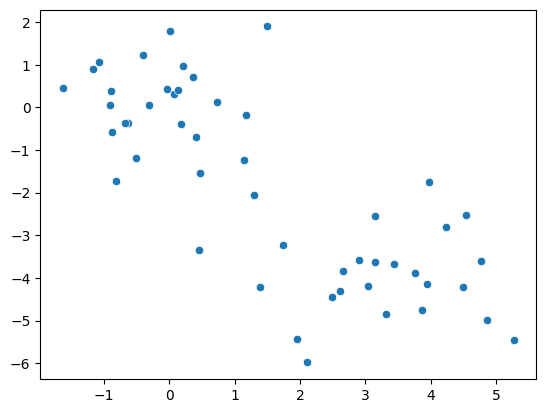

In [4]:
# wizualizacja zbioru danych
sns.scatterplot(x = X[:,0], y = X[:,1])

### Zadanie 1
---
Przygotuj model k-średnich dla liczby skupień równej 2.
Użyj funkcji `KMeans()`. Przedstaw na wykresie przydział obserwacji do utworzonych skupień.

In [5]:
# przygotowanie modelu KMenans
kmeans = KMeans(n_clusters = 2, n_init = 10).fit(X) # metoda .fit tylko na X (nie znamy wartości y!)

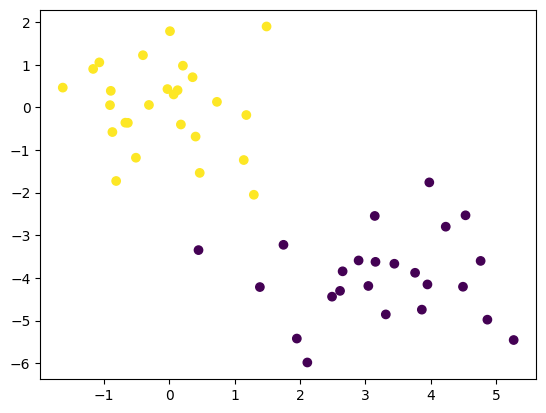

In [6]:
# dodanie skupień wyznaczonych z modelu KMeans
plt.scatter(X[:,0], X[:,1], c = kmeans.labels_) # .labels_ - etykiety z modelu

### Zadanie 2
---
Przygotuj model $k$-średnich dla k = 3. Narysuj wykres pokazujący przynależność obserwacji do utworzonych skupień oraz zaznacz wyznaczone centroidy.

In [7]:
# model KMeans
kmeans = KMeans(n_clusters = 3, random_state = 2).fit(X)

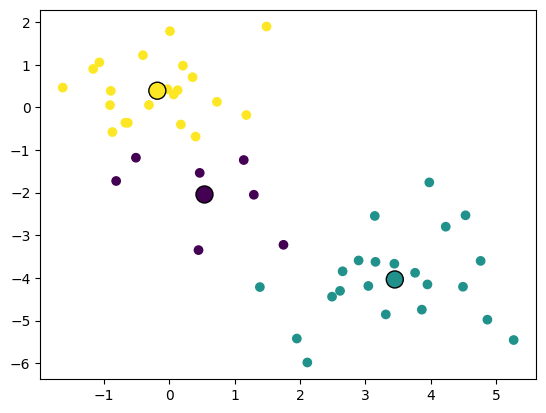

In [8]:
# wizualizacja zbioru danych
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
# dodanie wyznaczonych centroidów
plt.scatter(kmeans.cluster_centers_[:,0], # wartości 'x' centroidów
            kmeans.cluster_centers_[:,1], # wartości 'y' centroidów
            c = np.unique(kmeans.labels_), 
            edgecolors="black", # czarna krawędź punktów
            s=150) # rozmiar punktów


### Zadanie 3
---
Za co jest odpowiedzialny parametr [`n_init`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)? Porównaj model dla `n_init = 1` oraz `n_init = 20` używając `.inertia_` oraz czas wykonania.


In [9]:
# parametr n_init dotyczy liczby rozważanych prób wyboru początkowych centroidów

start_1 = time.time() # mierzymy czas
kmeans1 = KMeans(n_clusters = 3, random_state = 3, n_init = 1, init = "random").fit(X)
end_1 = time.time()

start_20 = time.time()
kmeans20 = KMeans(n_clusters = 3, random_state = 3, n_init = 20, init = "random").fit(X)
end_20 = time.time()

print(f"Czas dla n_init=1:  {end_1 - start_1:.4f} sekundy")
print(f"Czas dla n_init=20: {end_20 - start_20:.4f} sekundy")


Czas dla n_init=1:  0.0051 sekundy
Czas dla n_init=20: 0.0270 sekundy


In [10]:
print("SSE dla n_init=1:", kmeans1.inertia_)
print("SSE dla n_init=20:", kmeans20.inertia_)

SSE dla n_init=1: 77.06139101754458
SSE dla n_init=20: 75.0350825910044


> Note: Dla parametru `n_init` = 20 otrzymujemy mniejszy błąd SSE.

#### W jaki sposób są wybierane początkowe centroidy?

 K-średnich (K-Means) może tworzyć błędne klastry z powodu słabej inicjalizacji. Aby to naprawić, wprowadzono `K-Means++`. 
 
 Ulepsza on sposób wybierania początkowych centroidów, dzięki czemu skupienia stają się bardziej stabilna i dokładna. 
 
 > [K-Means++](https://www.geeksforgeeks.org/machine-learning/ml-k-means-algorithm/) to ulepszona wersja algorytmu K-średnich. Zamiast wybierać wszystkie centroidy losowo, wybiera on pierwszy środek losowo, a następnie dobiera pozostałe w odpowiednich odstępach. 
 
 Zapewnia to:
 - Lepszą separację skupień.
 - Szybszą zbieżność algorytmu.
 - Bardziej spójne wyniki w porównaniu do standardowego K-średnich.
 
Algorytm wykonuje następujące kroki:

Pierwszy środek: Wybierz pierwszy środek skupienia losowo (rozkład jednostajny) spośród punktów danych.

Kolejne środki: Oblicz odległość każdego punktu danych do jego najbliższego, już istniejącego środka. Wybierz kolejny środek z prawdopodobieństwem proporcjonalnym do kwadratu tej odległości. Punkty oddalone od istniejących środków mają większą szansę na zostanie wybranymi.

### Zadanie 4
---
Porównaj model $k$-means dla `k = 3` z różnymi ustawieniami hiperparametru `init`. Porównaj wartość `.inertia_` oraz czas wykonania.

In [11]:
# parametr init przyjmuje dwie wartości - random i kmeans++

start_random = time.time() # mierzymy czas
kmeans_random = KMeans(n_clusters = 3, random_state = 3, init = "random").fit(X)
end_random = time.time()

start_plusplus = time.time()
kmeans_plusplus = KMeans(n_clusters = 3, random_state = 3, init = "k-means++").fit(X)
end_plusplus = time.time()

print(f"Czas dla init=random:  {end_random - start_random:.4f} sekundy")
print(f"Czas dla init=k-means++: {end_plusplus - start_plusplus:.4f} sekundy")


Czas dla init=random:  0.0174 sekundy
Czas dla init=k-means++: 0.0000 sekundy


In [12]:
print("SSE dla init='random':", kmeans_random.inertia_)
print("SSE dla init='k-means++':", kmeans_plusplus.inertia_)

SSE dla init='random': 75.06261242745386
SSE dla init='k-means++': 76.85131986999251


### Jak wybrać optymalne $k$?

### Zadanie 5
---
Rozważ $k$ z przedziału `range(1, 11)`, przyygotuj dla zadanego $k$ model i wylicz SSE. Przedstaw rezultaty na wykresie.

In [13]:
# wektor do zapisywania błędu SSE dla każdego k
sse = []

# pętla po k, która sprawdza model kmeans dla n_clusters = k
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

Text(0.5, 1.0, 'Zależność SSE od liczby skupień k')

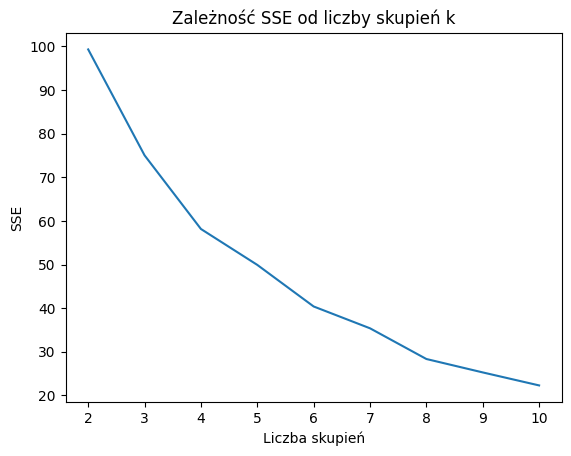

In [14]:
# wykres zależności SSE od k
plt.plot(range(2,11),sse)
plt.xticks(range(2, 11))
plt.xlabel("Liczba skupień")
plt.ylabel("SSE")
plt.title("Zależność SSE od liczby skupień k")

> Note: Widoczna zmiana dla k = 3 i k = 5 - potencjalne wartości do rozpatrzenia w modelu k-średnich.

Czy metoda k-średnich poradzi sobie z takim zbiorem danych?

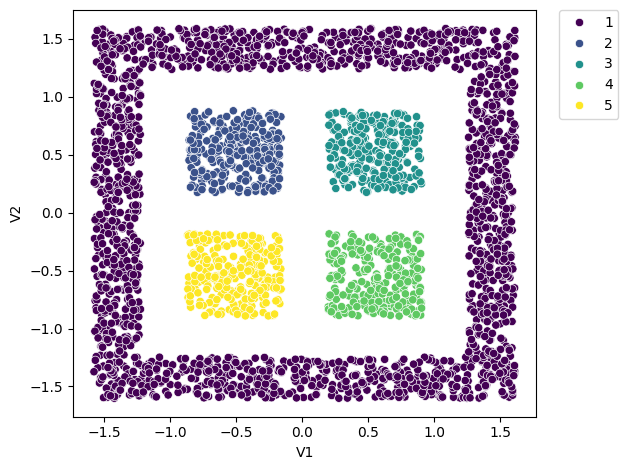

In [15]:
# Pobieranie danych WUT - windows
data_url = "https://github.com/gagolews/clustering-data-v1/raw/v1.1.0"
wut_windows = clustbench.load_dataset("wut", "windows", url=data_url)

df = pd.DataFrame(wut_windows.data, columns=["V1", "V2"])
df["Klasa"] = wut_windows.labels[0]  

# Wykres 
sns.scatterplot(data=df, x="V1", y="V2", hue="Klasa", palette="viridis")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

Spróbujmy przygotować model `KMeans()` dla powyższego zbioru danych.

In [16]:
# podział na X i y
y = df.Klasa
X = df.drop(["Klasa"], axis = 1)

In [17]:
# model k-średnich dla k = 5
kmeans = KMeans(n_clusters=5).fit(X)

In [18]:
# dodanie etykiet z modelu do zbioru danych
df["Etykieta"] = kmeans.labels_

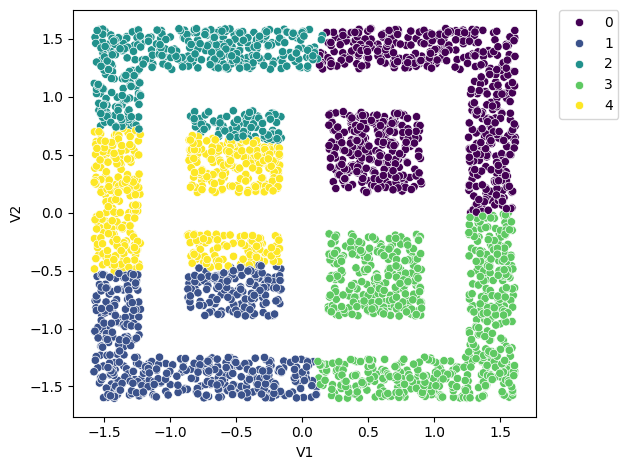

In [19]:
sns.scatterplot(data=df, x="V1", y="V2", hue="Etykieta", palette="viridis")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

Chyba jednak nie jest to odpowiednia metoda...